Época 0: Error cuadrático medio = 186.6152
Época 100: Error cuadrático medio = 5.0109
Época 200: Error cuadrático medio = 3.8515
Época 300: Error cuadrático medio = 3.1676
Época 400: Error cuadrático medio = 2.7642

Pesos finales: w=1.7877, b=3.4216


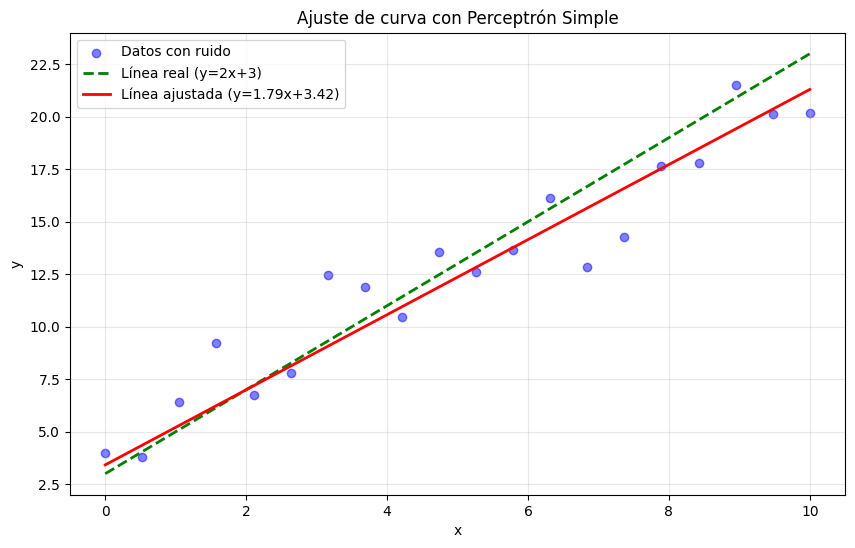

In [4]:
import matplotlib.pyplot as plt
import numpy as np

class PerceptronSimple:
    def __init__(self):
        self.w = 0.0  # peso (pendiente)
        self.b = 0.0  # sesgo (ordenada al origen)
    
    def predecir(self, x):
        """Predice el valor de y para un valor de x dado"""
        return self.w * x + self.b
    
    def aprender(self, X, y, ajuste=0.01, epochs=1000):
        """Ajusta la curva usando descenso de gradiente"""
        n = len(X)
        
        for epoch in range(epochs):
            # Predicciones
            y_pred = [self.predecir(x) for x in X]
            
            # Calcular errores
            errores = [yr - yp for yr, yp in zip(y, y_pred)]
            
    
            # Actualizar pesos
            self.w += ajuste * sum(e * x for e, x in zip(errores, X)) / n
            self.b += ajuste * sum(errores) / n
            
            # Mostrar progreso cada 100 épocas
            if epoch % 100 == 0:
                mse = sum(e**2 for e in errores) / n
                print(f"Época {epoch}: Error cuadrático medio = {mse:.4f}")
        
        print(f"\nPesos finales: w={self.w:.4f}, b={self.b:.4f}")

# Datos de ejemplo: una línea con algo de ruido
np.random.seed(42)
X = np.linspace(0, 10, 20)
y_real = 2 * X + 3  # Línea real: y = 2x + 3
y = y_real + np.random.normal(0, 2, len(X))  # Agregar ruido

# Crear y entrenar el perceptrón
p = PerceptronSimple()
p.aprender(X, y, ajuste=0.01, epochs=500)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Datos con ruido')
plt.plot(X, y_real, 'g--', label='Línea real (y=2x+3)', linewidth=2)

# Línea predicha
y_pred = [p.predecir(x) for x in X]
plt.plot(X, y_pred, 'r-', label=f'Línea ajustada (y={p.w:.2f}x+{p.b:.2f})', linewidth=2)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Ajuste de curva con Perceptrón Simple')
plt.show()